In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os





[1.94523 1.94523 1.94523 1.94523 1.94523 1.94523 1.94523 1.94523 1.94523
 1.94523 1.94523 1.94523 2.02563 1.94523 1.94523 1.94523 1.86482 1.86482
 1.70402 1.62362 1.62362 1.54322 1.38241 1.38241 1.30201 1.30201 1.22161
 1.22161 1.14121 1.14121 1.14121 1.14121 1.14121 1.0608  1.0608  1.0608
 1.0608  1.0608  1.0608  1.0608  1.0608  1.0608  1.0608  1.0608  1.0608
 1.0608  1.0608  1.0608  1.0608 ]
[2.91005 2.91005 2.99045 2.99045 2.99045 2.99045 2.99045 2.99045 2.99045
 2.91005 2.91005 2.91005 2.91005 2.91005 2.99045 2.82965 2.74925 2.66884
 2.50804 2.42764 2.10603 2.02563 1.86482 1.78442 1.62362 1.54322 1.46281
 1.38241 1.38241 1.30201 1.22161 1.22161 1.22161 1.14121 1.14121 1.14121
 1.14121 1.14121 1.14121 1.14121 1.14121 1.0608  1.14121 1.14121 1.14121
 1.14121 1.14121 1.14121 1.0608 ]
[3.95528 3.87487 3.95528 3.95528 3.87487 3.95528 3.87487 3.95528 3.87487
 3.95528 3.87487 3.87487 3.95528 3.87487 3.87487 3.79447 3.63367 3.47286
 3.31206 3.07085 2.74925 2.50804 2.34724 2.18643 2.0256

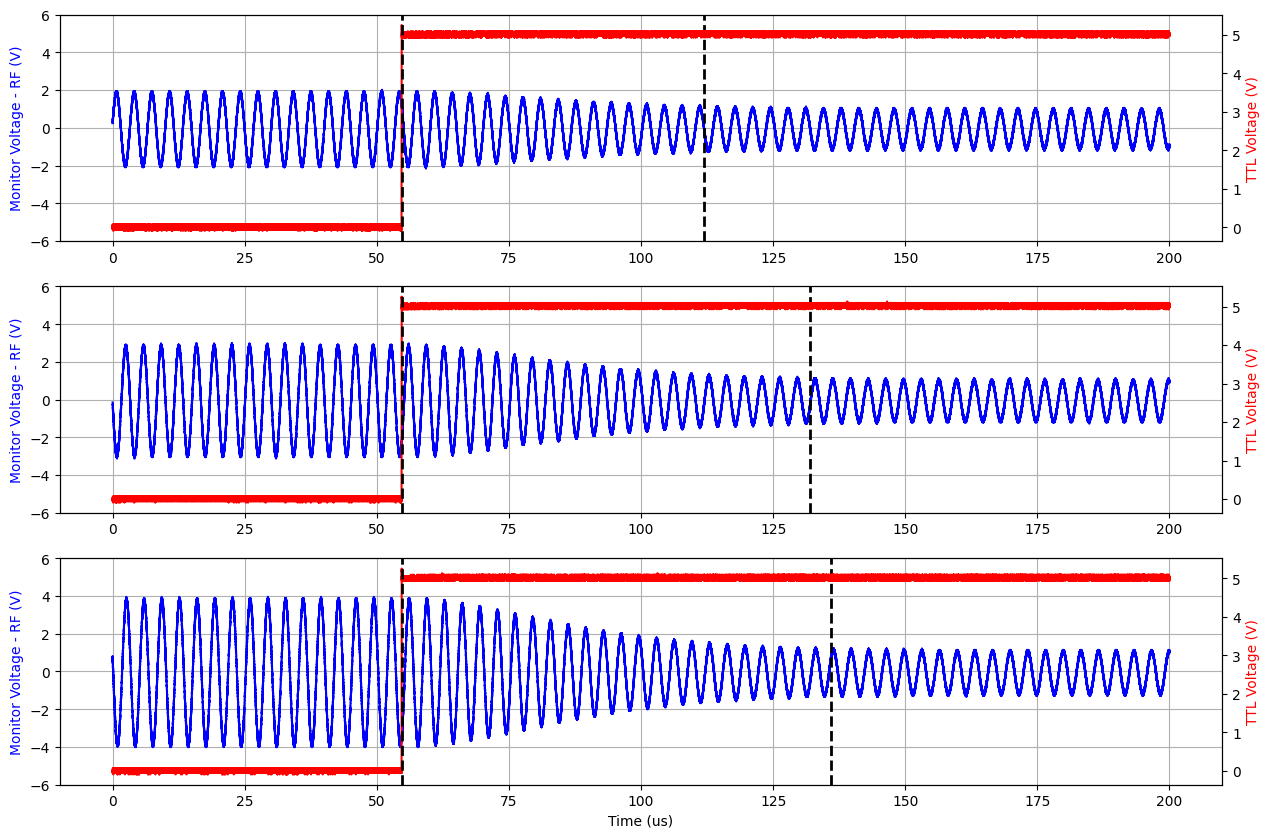

In [ ]:
folderPath = r'C:\Users\au581149\PhD-Work\Lab Stuff\ESI\Equipment\Time Constants - RF Switch\DATA'
fig,ax = plt.subplots(3,1,figsize = (15,10))
second_axes = [axe.twinx() for axe in ax]

axLeftColor = 'b'
axRightColor = 'r'
for axe in ax:
    axe.grid()
    axe.set_ylim(-6,6)
    print()
# Get all the files in the folder
files = os.listdir(folderPath)


def isOdd(n):
    return n % 2 != 0

triggerTimes = np.zeros(3)
stabilizedTimes = np.zeros(3)


#Loop through the files
for j,file in enumerate(files):
    #Check if the file is a .csv file
    if file.endswith('.csv'):
        #Open the file
        data = np.loadtxt(folderPath + '\\' + file, delimiter=',', skiprows=2)
        t = (data[:,0] - data[0,0])*1e6
        V = data[:,1]
        if isOdd(j):
            ax[j//2].plot(t,V,label = file,color = axLeftColor)
            ax[j//2].set_ylabel('Monitor Voltage - RF (V)', color = axLeftColor)
            
            divSize = 4
            nDivisions = int(np.floor(t[-1]/divSize))
            maxInDivision = np.zeros(nDivisions)
            for n in range(nDivisions):
                t_start = n * divSize
                t_end = (n+1) * divSize
                maxInDivision[n] = np.max(V[(t > t_start) & (t < t_end)])
            
            print(maxInDivision)
            stabilizedTimes[j//2] = t[np.where(maxInDivision < maxInDivision[-1] * 1.1)[0][0] * len(t[(t > t_start) & (t < t_end)])]
            ax[j//2].axvline(stabilizedTimes[j//2], color = 'k', linestyle = '--', linewidth = 2,zorder  =100)
        else:
            second_axes[j//2].plot(t,V,label = file,color = axRightColor)
            second_axes[j//2].set_ylabel('TTL Voltage (V)', color = axRightColor)
            triggerTimes[j//2] = t[np.argmin(np.abs(V-2.5))]
            second_axes[j//2].axvline(triggerTimes[j//2], color = 'k', linestyle = '--',linewidth = 2,zorder = 100)
ax[-1].set_xlabel('Time (us)') 

FallTimes = stabilizedTimes-triggerTimes

print('Fall times are', FallTimes)